# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

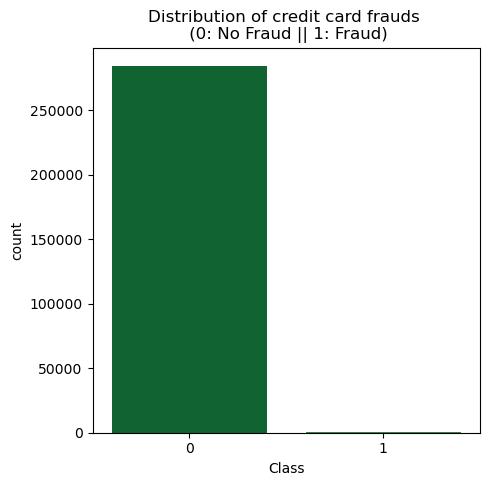

In [7]:
sns.set_palette("Greens_r")
fig, ax = plt.subplots(figsize=(5,5))
bar = sns.countplot(x=credit_card_data["Class"],ax=ax)
bar.set_title('Distribution of credit card frauds \n (0: No Fraud || 1: Fraud)')
plt.show()

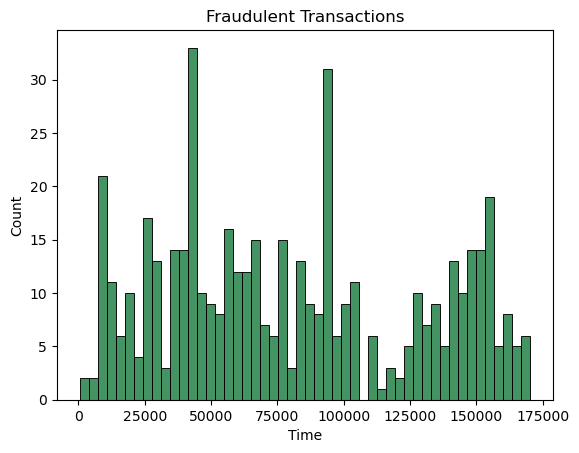

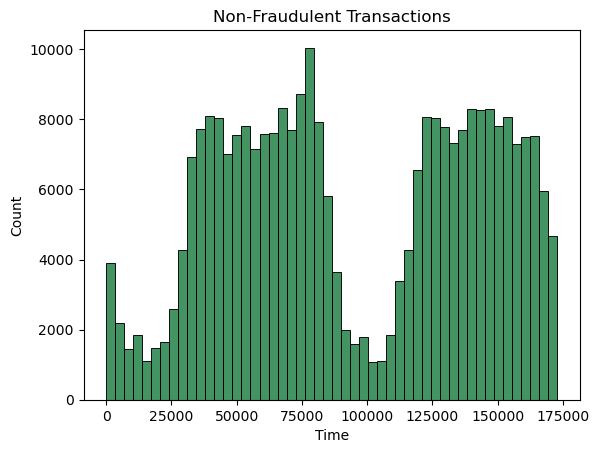

In [8]:
g1 = sns.histplot(credit_card_data["Time"][credit_card_data.Class == 1], bins=50)
g1.set_title("Fraudulent Transactions")
plt.show()
g1 = sns.histplot(credit_card_data["Time"][credit_card_data.Class == 0], bins=50)
g1.set_title("Non-Fraudulent Transactions")
plt.show()

In [9]:
legit = credit_card_data[credit_card_data['Class']==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [10]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
legit_sample = legit.sample(n=492)

In [15]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [16]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91064,63300.0,-1.838488,1.282369,0.890200,1.527454,-0.320940,-0.376549,-0.243094,0.821562,-0.631449,...,0.047018,0.221527,-0.351435,0.457666,0.126422,-0.217250,0.012240,-0.114686,16.18,0
224745,143944.0,1.941815,0.119844,-3.673547,0.489121,3.207567,3.071780,0.137725,0.654318,-0.018869,...,-0.017886,-0.016706,-0.025576,0.580576,0.498230,-0.475005,0.012611,-0.028622,45.30,0
206107,136070.0,-0.656102,1.605910,1.439829,3.971510,0.648236,2.801328,-0.585224,1.225354,-2.099209,...,0.356145,1.202804,-0.162340,-1.618908,-0.550199,0.586433,0.371754,0.143054,1.00,0
124808,77432.0,-0.921222,-0.093018,1.762052,-1.672315,-1.555781,-0.331751,-0.792184,0.406701,-3.013708,...,-0.192917,-0.435995,-0.020962,0.294214,-0.029876,-0.305890,-0.145270,-0.001977,45.00,0
97484,66238.0,-0.826949,0.076650,2.008733,0.354098,0.592065,0.711734,0.521318,0.174310,0.204608,...,0.068214,0.472774,-0.099389,-0.281607,-0.007495,-0.492361,-0.017817,-0.084447,63.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [17]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

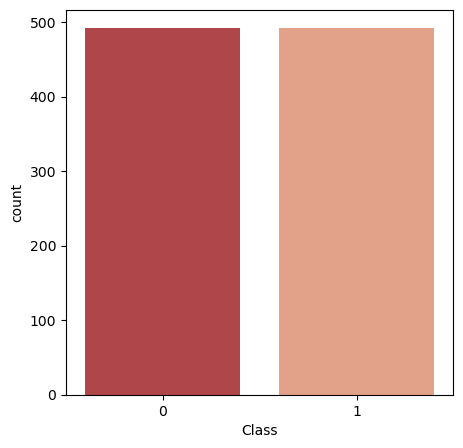

In [18]:
sns.set_palette("RdBu")
fig, ax = plt.subplots(figsize=(5,5))
bar = sns.countplot(x=new_df["Class"],ax=ax)
plt.show()

In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93383.252033,-0.007773,-0.058275,0.099148,0.004445,0.026337,0.084353,0.057391,0.032825,-0.010433,...,-0.069131,-0.031808,0.003518,0.039689,0.015739,0.059434,-0.022148,0.005157,-0.012862,86.777764
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


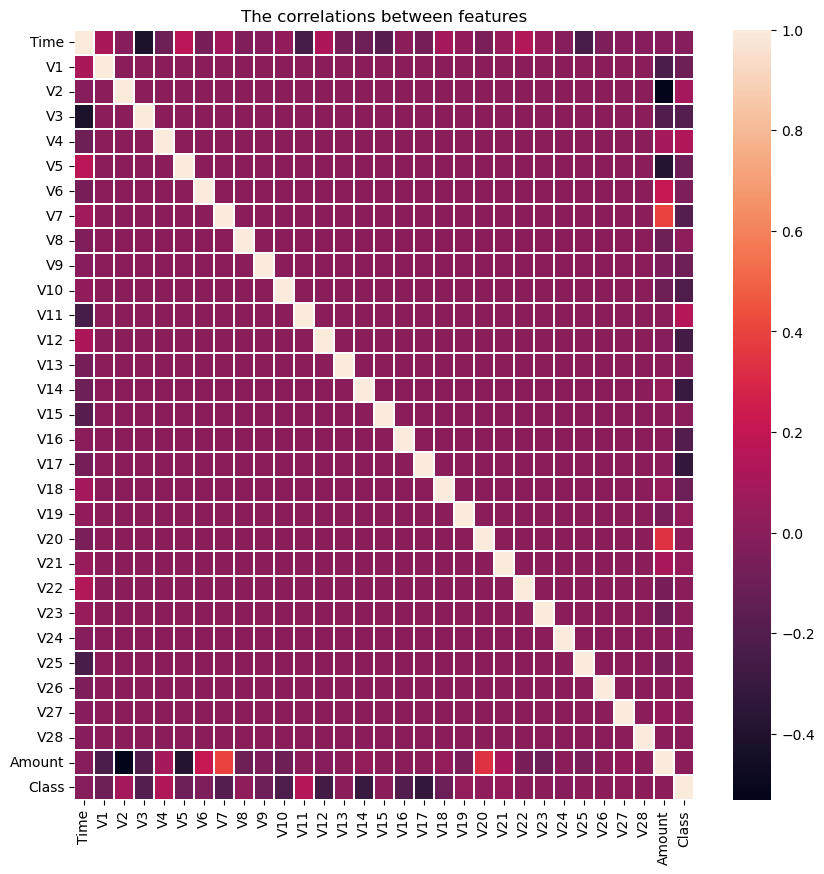

In [20]:
plt.figure(figsize = (10,10))
plt.title('The correlations between features')
corr = credit_card_data.corr()
sns.heatmap(corr,linewidths=.1)
plt.show()

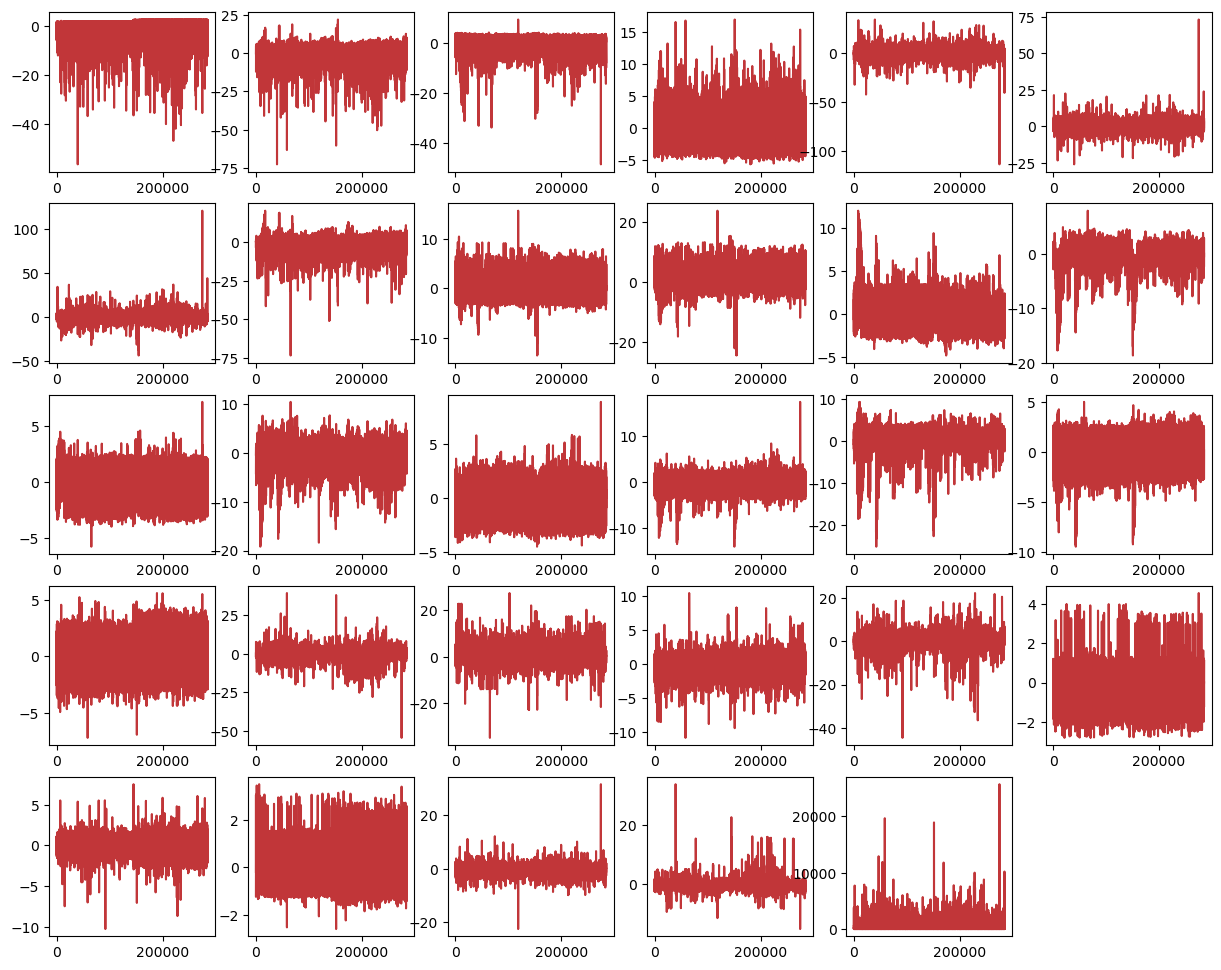

In [21]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(credit_card_data.V1) ; plt.subplot(5, 6, 15) ; plt.plot(credit_card_data.V15)
plt.subplot(5, 6, 2) ; plt.plot(credit_card_data.V2) ; plt.subplot(5, 6, 16) ; plt.plot(credit_card_data.V16)
plt.subplot(5, 6, 3) ; plt.plot(credit_card_data.V3) ; plt.subplot(5, 6, 17) ; plt.plot(credit_card_data.V17)
plt.subplot(5, 6, 4) ; plt.plot(credit_card_data.V4) ; plt.subplot(5, 6, 18) ; plt.plot(credit_card_data.V18)
plt.subplot(5, 6, 5) ; plt.plot(credit_card_data.V5) ; plt.subplot(5, 6, 19) ; plt.plot(credit_card_data.V19)
plt.subplot(5, 6, 6) ; plt.plot(credit_card_data.V6) ; plt.subplot(5, 6, 20) ; plt.plot(credit_card_data.V20)
plt.subplot(5, 6, 7) ; plt.plot(credit_card_data.V7) ; plt.subplot(5, 6, 21) ; plt.plot(credit_card_data.V21)
plt.subplot(5, 6, 8) ; plt.plot(credit_card_data.V8) ; plt.subplot(5, 6, 22) ; plt.plot(credit_card_data.V22)
plt.subplot(5, 6, 9) ; plt.plot(credit_card_data.V9) ; plt.subplot(5, 6, 23) ; plt.plot(credit_card_data.V23)
plt.subplot(5, 6, 10) ; plt.plot(credit_card_data.V10) ; plt.subplot(5, 6, 24) ; plt.plot(credit_card_data.V24)
plt.subplot(5, 6, 11) ; plt.plot(credit_card_data.V11) ; plt.subplot(5, 6, 25) ; plt.plot(credit_card_data.V25)
plt.subplot(5, 6, 12) ; plt.plot(credit_card_data.V12) ; plt.subplot(5, 6, 26) ; plt.plot(credit_card_data.V26)
plt.subplot(5, 6, 13) ; plt.plot(credit_card_data.V13) ; plt.subplot(5, 6, 27) ; plt.plot(credit_card_data.V27)
plt.subplot(5, 6, 14) ; plt.plot(credit_card_data.V14) ; plt.subplot(5, 6, 28) ; plt.plot(credit_card_data.V28)
plt.subplot(5, 6, 29) ; plt.plot(credit_card_data.Amount)
plt.show()

In [22]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
model=LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

C:\Users\Rani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
X_train_prediction = model.predict(X_train)

In [27]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9479034307496823


In [28]:
X_test_prediction = model.predict(X_test)

In [29]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


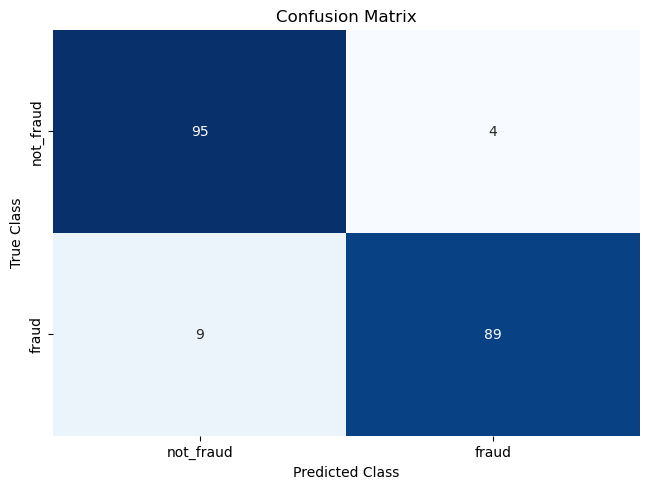

In [30]:
from sklearn.metrics import confusion_matrix
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Y_test, X_test_prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [31]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(Y_test, X_test_prediction), 2)
recall_score = round(recall_score(Y_test, X_test_prediction), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.91
F1 Score for Logistic Regression Model 1 : 0.93
